<a href="https://colab.research.google.com/github/titangil/Automatic-Detection-of-Defective-Photovoltaic-Modules-by-Aerial-Thermographic-Inspections/blob/main/MMSegmentation_Tutorial(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MMSegmentation Tutorial
Welcome to MMSegmentation! 

In this tutorial, we demo
* How to do inference with MMSeg trained weight
* How to train on your own dataset and visualize the results. 

## Install MMSegmentation
This step may take several minutes. 

We use PyTorch 1.10 and CUDA 11.1 for this tutorial. You may install other versions by change the version number in pip install command. 

In [1]:
# Check nvcc version
!nvcc -V
# Check GCC version
!gcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [2]:
# Install PyTorch
!conda install pytorch=1.10.0 torchvision cudatoolkit=11.1 -c pytorch
# Install MMCV
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu111/torch1.10/index.html

/bin/bash: conda: command not found
Looking in links: https://download.openmmlab.com/mmcv/dist/cu111/torch1.10/index.html
     |████████████████████████████████| 46.3 MB 37 kB/s 
     |████████████████████████████████| 190 kB 16.5 MB/s 


In [3]:
!rm -rf mmsegmentation
!git clone https://github.com/open-mmlab/mmsegmentation.git 
%cd mmsegmentation
!pip install -e .

Cloning into 'mmsegmentation'...
remote: Enumerating objects: 6986, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 6986 (delta 3), reused 14 (delta 3), pack-reused 6967
Receiving objects: 100% (6986/6986), 13.26 MiB | 13.74 MiB/s, done.
Resolving deltas: 100% (5156/5156), done.
/content/mmsegmentation
Obtaining file:///content/mmsegmentation
     |████████████████████████████████| 572 kB 9.1 MB/s 
  Running setup.py develop for mmsegmentation


In [4]:
# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Check MMSegmentation installation
import mmseg
print(mmseg.__version__)

1.11.0+cu113 True
0.24.1


## Run Inference with MMSeg trained weight

In [5]:
!mkdir checkpoints
!wget https://download.openmmlab.com/mmsegmentation/v0.5/pspnet/pspnet_r50-d8_512x1024_40k_cityscapes/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth -P checkpoints

--2022-05-08 14:38:36--  https://download.openmmlab.com/mmsegmentation/v0.5/pspnet/pspnet_r50-d8_512x1024_40k_cityscapes/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.252.96.28
Connecting to download.openmmlab.com (download.openmmlab.com)|47.252.96.28|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 196205945 (187M) [application/octet-stream]
Saving to: ‘checkpoints/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth’

pspnet_r50-d8_512x1 100%[===================>] 187.12M  8.24MB/s    in 23s     

2022-05-08 14:38:59 (8.20 MB/s) - ‘checkpoints/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth’ saved [196205945/196205945]



In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
from mmseg.apis import inference_segmentor, init_segmentor, show_result_pyplot
from mmseg.core.evaluation import get_palette

In [8]:
config_file = '/content/mmsegmentation/configs/swin/upernet_swin_tiny_patch4_window7_512x512_160k_ade20k_pretrain_224x224_1K.py'
checkpoint_file ='/content/drive/Shareddrives/TITAN shared/upernet_swin_tiny_patch4_window7_512x512_160k_ade20k_pretrain_224x224_1K_20210531_112542-e380ad3e.pth'

In [ ]:
config_file = 'configs/pspnet/pspnet_r50-d8_512x1024_40k_cityscapes.py'
checkpoint_file = '/content/checkpoints/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth'

In [9]:
# build the model from a config file and a checkpoint file
model = init_segmentor(config_file, checkpoint_file, device='cuda:0')

/content/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:236: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  'Default ``avg_non_ignore`` is False, if you would like to '


load checkpoint from local path: /content/drive/Shareddrives/TITAN shared/upernet_swin_tiny_patch4_window7_512x512_160k_ade20k_pretrain_224x224_1K_20210531_112542-e380ad3e.pth


In [10]:
# test a single image
img = 'demo/demo.png'
result = inference_segmentor(model, img)

/content/mmsegmentation/mmseg/models/segmentors/base.py:289: UserWarning: show==False and out_file is not specified, only result image will be returned
  warnings.warn('show==False and out_file is not specified, only '


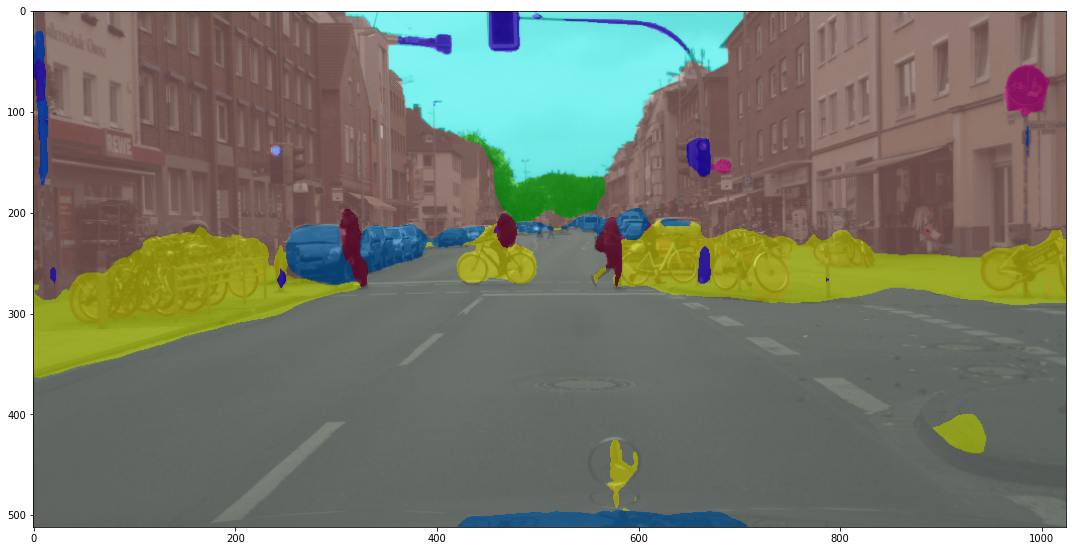

In [11]:
show_result_pyplot(model, img, result) # SWIN

/content/mmsegmentation/mmseg/models/segmentors/base.py:289: UserWarning: show==False and out_file is not specified, only result image will be returned
  warnings.warn('show==False and out_file is not specified, only '


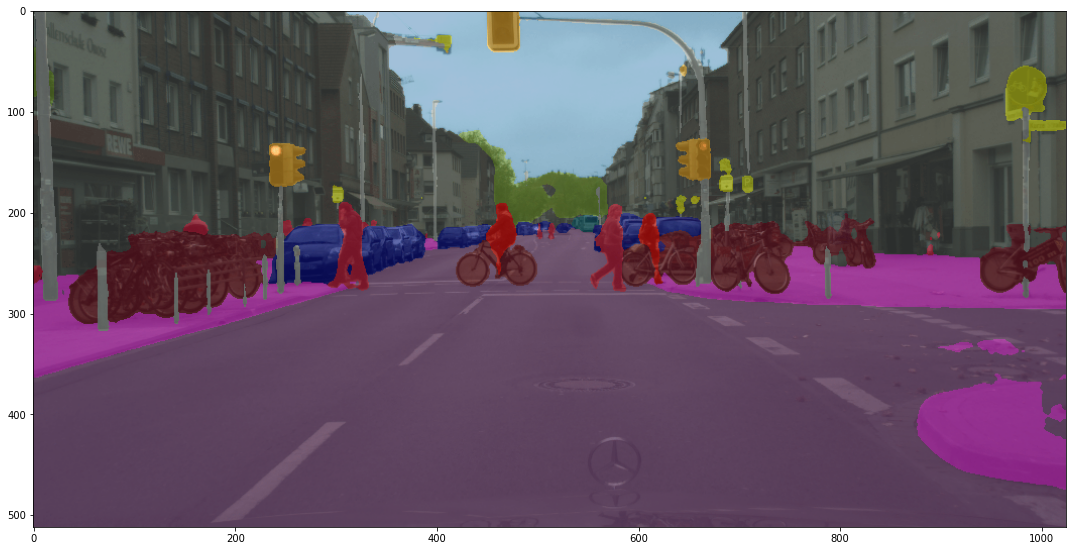

In [ ]:
# show the results
show_result_pyplot(model, img, result) # PSPnet

/content/mmsegmentation/mmseg/models/segmentors/base.py:289: UserWarning: show==False and out_file is not specified, only result image will be returned
  warnings.warn('show==False and out_file is not specified, only '


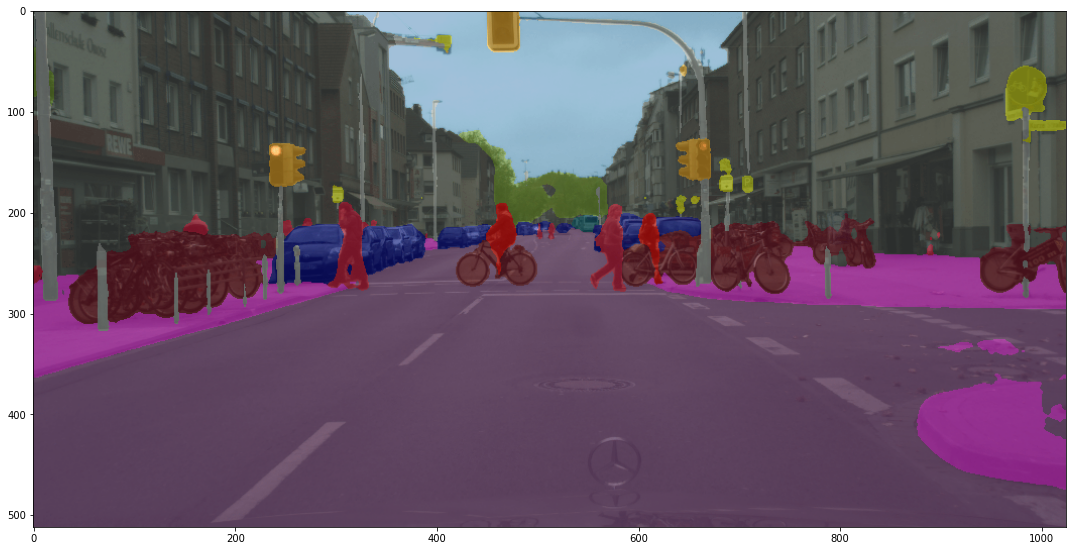

In [ ]:
# show the results
show_result_pyplot(model, img, result)

In [ ]:
print(result)

[array([[2, 2, 5, ..., 2, 2, 2],
       [2, 2, 5, ..., 2, 2, 2],
       [2, 2, 5, ..., 2, 2, 2],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])]


## Train a semantic segmentation model on a new dataset

To train on a customized dataset, the following steps are necessary. 
1. Add a new dataset class. 
2. Create a config file accordingly. 
3. Perform training and evaluation. 

### Add a new dataset

Datasets in MMSegmentation require image and semantic segmentation maps to be placed in folders with the same prefix. To support a new dataset, we may need to modify the original file structure. 

In this tutorial, we give an example of converting the dataset. You may refer to [docs](https://github.com/open-mmlab/mmsegmentation/blob/master/docs/en/tutorials/customize_datasets.md#customize-datasets-by-reorganizing-data) for details about dataset reorganization. 

We use [Stanford Background Dataset](http://dags.stanford.edu/projects/scenedataset.html) as an example. The dataset contains 715 images chosen from existing public datasets [LabelMe](http://labelme.csail.mit.edu), [MSRC](http://research.microsoft.com/en-us/projects/objectclassrecognition), [PASCAL VOC](http://pascallin.ecs.soton.ac.uk/challenges/VOC) and [Geometric Context](http://www.cs.illinois.edu/homes/dhoiem/). Images from these datasets are mainly outdoor scenes, each containing approximately 320-by-240 pixels. 
In this tutorial, we use the region annotations as labels. There are 8 classes in total, i.e. sky, tree, road, grass, water, building, mountain, and foreground object. 

In [12]:
# download and unzip
!wget http://dags.stanford.edu/data/iccv09Data.tar.gz -O stanford_background.tar.gz
!tar xf stanford_background.tar.gz

--2022-05-08 14:40:24--  http://dags.stanford.edu/data/iccv09Data.tar.gz
Resolving dags.stanford.edu (dags.stanford.edu)... 171.64.68.10
Connecting to dags.stanford.edu (dags.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14727974 (14M) [application/x-gzip]
Saving to: ‘stanford_background.tar.gz’

stanford_background 100%[===================>]  14.04M  8.82MB/s    in 1.6s    

2022-05-08 14:40:26 (8.82 MB/s) - ‘stanford_background.tar.gz’ saved [14727974/14727974]



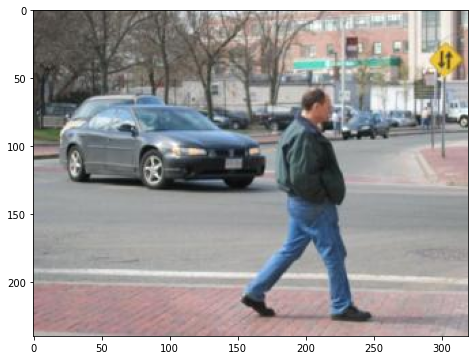

In [13]:
# Let's take a look at the dataset
import mmcv
import matplotlib.pyplot as plt

img = mmcv.imread('iccv09Data/images/6000124.jpg')
plt.figure(figsize=(8, 6))
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

_____________________________________________________________________
**Test coco --> array**

---


_____________________________________________________________________



In [14]:
!pip install pycocotools

In [15]:
from pycocotools.coco import COCO
import os
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

In [98]:
coco = COCO('/content/drive/Shareddrives/TITAN shared/UAVVaste/annotations/annotations.json')
img_dir = '/content/drive/Shareddrives/TITAN shared/UAVVaste/images'
image_id = 74

img = coco.imgs[image_id]

loading annotations into memory...
Done (t=0.02s)
creating index...
index created!


[{'id': 259, 'image_id': 74, 'category_id': 0, 'segmentation': [[475, 351, 564, 296, 651, 396, 553, 469]], 'area': 15471.5, 'bbox': [475, 296, 176, 173], 'iscrowd': 0}, {'id': 260, 'image_id': 74, 'category_id': 0, 'segmentation': [[893, 909, 956, 885, 990, 972, 990, 1017, 967, 1032]], 'area': 7300.5, 'bbox': [893, 885, 97, 147], 'iscrowd': 0}, {'id': 261, 'image_id': 74, 'category_id': 0, 'segmentation': [[3396, 1064, 3401, 1111, 3298, 1114, 3277, 1064]], 'area': 5403.0, 'bbox': [3277, 1064, 123, 49], 'iscrowd': 0}, {'id': 262, 'image_id': 74, 'category_id': 0, 'segmentation': [[2482, 501, 2472, 543, 2556, 559, 2561, 522]], 'area': 3358.0, 'bbox': [2472, 501, 89, 57], 'iscrowd': 0}, {'id': 263, 'image_id': 74, 'category_id': 0, 'segmentation': [[188, 2053, 227, 2059, 290, 2111, 264, 2156, 175, 2159, 153, 2143]], 'area': 9841.5, 'bbox': [153, 2053, 136, 105], 'iscrowd': 0}]
<class 'numpy.ndarray'>
BATCH_d07_img_6160.jpg


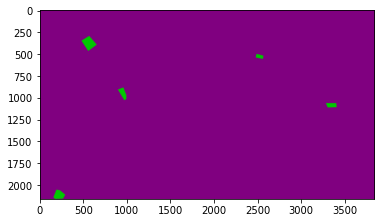

In [97]:

classes = ('ground','rubbish','rubbish')
palette = [[128, 0, 128],[0,200,0],[0,200,0]]



image = np.array(Image.open(os.path.join(img_dir, img['file_name'])))
plt.imshow(image, interpolation='nearest')
'''plt.show()

plt.imshow(image)'''
cat_ids = coco.getCatIds()
anns_ids = coco.getAnnIds(imgIds=img['id'], catIds=cat_ids, iscrowd=None)
#print(cat_ids,anns_ids)
anns = coco.loadAnns(anns_ids)
print(anns)
#coco.showAnns(anns)



mask = coco.annToMask(anns[0])
print(type(mask))
for i in range(len(anns)):
    mask += coco.annToMask(anns[i])
seg_img = Image.fromarray(mask).convert('P')
seg_img.putpalette(np.array(palette, dtype=np.uint8))
print(img['file_name'])
#print(osp.join('/content/drive/Shareddrives/TITAN shared/UAVVaste/annotations',str(img['id'])+'.png'))
seg_img.save(osp.join('/content/drive/Shareddrives/TITAN shared/UAVVaste/annotations',str(img['file_name']).replace('.jpg','.png')))
                                            
plt.imshow(seg_img)



In [47]:
print(type(mask))

<class 'numpy.ndarray'>


In [109]:
import json
f = open ('/content/drive/Shareddrives/TITAN shared/UAVVaste/annotations/annotations.json', "r")
data = json.loads(f.read())
id = 0

classes = ('ground','rubbish','rubbish')
palette = [[128, 0, 128],[0,200,0],[0,200,0]]

for i in data['images']:
  filename = (i['file_name'])
  image = np.array(Image.open(os.path.join(img_dir,filename)))
  cat_ids = coco.getCatIds()
  anns_ids = coco.getAnnIds(imgIds=id, catIds=cat_ids, iscrowd=None)
  anns = coco.loadAnns(anns_ids)
  mask = coco.annToMask(anns[0])
  for i in range(len(anns)):
    mask += coco.annToMask(anns[i])
  seg_img = Image.fromarray(mask).convert('P')
  seg_img.putpalette(np.array(palette, dtype=np.uint8))
  filename = filename[:-4]
  #print(osp.join('/content/drive/Shareddrives/TITAN shared/UAVVaste/annotations',filename+'.png'))
  seg_img.save(osp.join('/content/drive/Shareddrives/TITAN shared/UAVVaste/annotations',filename+'.png'))
  
  id+=1
  print(os.path.join(img_dir,filename), str(id))

/content/drive/Shareddrives/TITAN shared/UAVVaste/images/BATCH_d07_img_6400 1
/content/drive/Shareddrives/TITAN shared/UAVVaste/images/BATCH_d07_img_580 2
/content/drive/Shareddrives/TITAN shared/UAVVaste/images/BATCH_d07_img_2380 3
/content/drive/Shareddrives/TITAN shared/UAVVaste/images/BATCH_d07_img_880 4
/content/drive/Shareddrives/TITAN shared/UAVVaste/images/BATCH_d07_img_4550 5
/content/drive/Shareddrives/TITAN shared/UAVVaste/images/BATCH_d07_img_410 6
/content/drive/Shareddrives/TITAN shared/UAVVaste/images/BATCH_d07_img_6030 7
/content/drive/Shareddrives/TITAN shared/UAVVaste/images/BATCH_d07_img_3470 8
/content/drive/Shareddrives/TITAN shared/UAVVaste/images/BATCH_d07_img_6970 9
/content/drive/Shareddrives/TITAN shared/UAVVaste/images/BATCH_d07_img_5110 10
/content/drive/Shareddrives/TITAN shared/UAVVaste/images/BATCH_d07_img_1250 11
/content/drive/Shareddrives/TITAN shared/UAVVaste/images/BATCH_d07_img_450 12
/content/drive/Shareddrives/TITAN shared/UAVVaste/images/BATCH_d0

We need to convert the annotation into semantic map format as an image.

In [ ]:
import os.path as osp
import numpy as np
from PIL import Image
i = 0
for file in mmcv.scandir(osp.join(img_dir), suffix='.jpg'):
  #image = np.array(Image.open(os.path.join(img_dir,file)))
  print(file)
  i+=1

print()

In [111]:
import os.path as osp
import numpy as np
from PIL import Image
# convert dataset annotation to semantic segmentation map
data_root = 'iccv09Data'
img_dir = 'images'
ann_dir = 'labels'
# define class and plaette for better visualization
classes = ('sky', 'tree', 'road', 'grass', 'water', 'bldg', 'mntn', 'fg obj')
palette = [[128, 128, 128], [129, 127, 38], [120, 69, 125], [53, 125, 34], 
           [0, 11, 123], [118, 20, 12], [122, 81, 25], [241, 134, 51]]
'''for file in mmcv.scandir(osp.join(data_root, ann_dir), suffix='.regions.txt'):
  seg_map = np.loadtxt(osp.join(data_root, ann_dir, file)).astype(np.uint8)
  seg_img = Image.fromarray(seg_map).convert('P')
  seg_img.putpalette(np.array(palette, dtype=np.uint8))
  seg_img.save(osp.join(data_root, ann_dir, file.replace('.regions.txt','.png')))
  #print(type(seg_img))'''

In [ ]:
# Let's take a look at the segmentation map we got
import matplotlib.patches as mpatches
img = Image.open('/content/drive/Shareddrives/TITAN shared/UAVVaste/annotations/BATCH_d06_img_0.png')
plt.figure(figsize=(8, 6))
im = plt.imshow(np.array(img.convert('RGB')))


# create a patch (proxy artist) for every color 
patches = [mpatches.Patch(color=np.array(palette[i])/255., 
                          label=classes[i]) for i in range(8)]
# put those patched as legend-handles into the legend
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., 
           fontsize='large')

#plt.show()

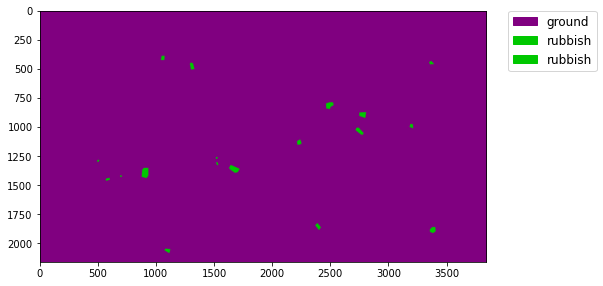

In [115]:
# Let's take a look at the segmentation map we got
import matplotlib.patches as mpatches
img = Image.open('/content/drive/Shareddrives/TITAN shared/UAVVaste/annotations/BATCH_d06_img_1440.png')
plt.figure(figsize=(8, 6))
im = plt.imshow(np.array(img.convert('RGB')))

classes = ('ground','rubbish','rubbish')
palette = [[128, 0, 128],[0,200,0],[0,200,0]]

# create a patch (proxy artist) for every color 
patches = [mpatches.Patch(color=np.array(palette[i])/255., 
                          label=classes[i]) for i in range(3)]
# put those patched as legend-handles into the legend
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., 
           fontsize='large')

#plt.show()

In [46]:
print((patches))

[<matplotlib.patches.Patch object at 0x7fe7fb3bfb50>, <matplotlib.patches.Patch object at 0x7fe7faf2ebd0>, <matplotlib.patches.Patch object at 0x7fe7faf2ec90>, <matplotlib.patches.Patch object at 0x7fe7faf2ed90>, <matplotlib.patches.Patch object at 0x7fe7faf2ed50>, <matplotlib.patches.Patch object at 0x7fe7faf2ef50>, <matplotlib.patches.Patch object at 0x7fe7faf2efd0>, <matplotlib.patches.Patch object at 0x7fe7faf3a110>]


In [117]:
# split train/val set randomly
data_root = '/content/drive/Shareddrives/TITAN shared/UAVVaste'
ann_dir = '/content/drive/Shareddrives/TITAN shared/UAVVaste/annotations'
img_dir = '/content/drive/Shareddrives/TITAN shared/UAVVaste/images'
split_dir = 'splits'
mmcv.mkdir_or_exist(osp.join(data_root, split_dir))
filename_list = [osp.splitext(filename)[0] for filename in mmcv.scandir(
    osp.join(data_root, ann_dir), suffix='.png')]
with open(osp.join(data_root, split_dir, 'train.txt'), 'w') as f:
  # select first 4/5 as train set
  train_length = int(len(filename_list)*4/5)
  f.writelines(line + '\n' for line in filename_list[:train_length])
with open(osp.join(data_root, split_dir, 'val.txt'), 'w') as f:
  # select last 1/5 as train set
  f.writelines(line + '\n' for line in filename_list[train_length:])

After downloading the data, we need to implement `load_annotations` function in the new dataset class `StanfordBackgroundDataset`.

In [118]:
from mmseg.datasets.builder import DATASETS
from mmseg.datasets.custom import CustomDataset

@DATASETS.register_module()
class StanfordBackgroundDataset(CustomDataset):
  CLASSES = classes
  PALETTE = palette
  def __init__(self, split, **kwargs):
    super().__init__(img_suffix='.jpg', seg_map_suffix='.png', 
                     split=split, **kwargs)
    assert osp.exists(self.img_dir) and self.split is not None

    

### Create a config file
In the next step, we need to modify the config for the training. To accelerate the process, we finetune the model from trained weights.

In [ ]:
from mmcv import Config
cfg = Config.fromfile('configs/pspnet/pspnet_r50-d8_512x1024_40k_cityscapes.py')

Since the given config is used to train PSPNet on the cityscapes dataset, we need to modify it accordingly for our new dataset.  

In [ ]:
from mmseg.apis import set_random_seed

# Since we use only one GPU, BN is used instead of SyncBN
cfg.norm_cfg = dict(type='BN', requires_grad=True)
cfg.model.backbone.norm_cfg = cfg.norm_cfg
cfg.model.decode_head.norm_cfg = cfg.norm_cfg
cfg.model.auxiliary_head.norm_cfg = cfg.norm_cfg
# modify num classes of the model in decode/auxiliary head
cfg.model.decode_head.num_classes = 8
cfg.model.auxiliary_head.num_classes = 8

# Modify dataset type and path
cfg.dataset_type = 'StanfordBackgroundDataset'
cfg.data_root = data_root

cfg.data.samples_per_gpu = 8
cfg.data.workers_per_gpu=8

cfg.img_norm_cfg = dict(
    mean=[123.675, 116.28, 103.53], std=[58.395, 57.12, 57.375], to_rgb=True)
cfg.crop_size = (256, 256)
cfg.train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations'),
    dict(type='Resize', img_scale=(320, 240), ratio_range=(0.5, 2.0)),
    dict(type='RandomCrop', crop_size=cfg.crop_size, cat_max_ratio=0.75),
    dict(type='RandomFlip', flip_ratio=0.5),
    dict(type='PhotoMetricDistortion'),
    dict(type='Normalize', **cfg.img_norm_cfg),
    dict(type='Pad', size=cfg.crop_size, pad_val=0, seg_pad_val=255),
    dict(type='DefaultFormatBundle'),
    dict(type='Collect', keys=['img', 'gt_semantic_seg']),
]

cfg.test_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(
        type='MultiScaleFlipAug',
        img_scale=(320, 240),
        # img_ratios=[0.5, 0.75, 1.0, 1.25, 1.5, 1.75],
        flip=False,
        transforms=[
            dict(type='Resize', keep_ratio=True),
            dict(type='RandomFlip'),
            dict(type='Normalize', **cfg.img_norm_cfg),
            dict(type='ImageToTensor', keys=['img']),
            dict(type='Collect', keys=['img']),
        ])
]


cfg.data.train.type = cfg.dataset_type
cfg.data.train.data_root = cfg.data_root
cfg.data.train.img_dir = img_dir
cfg.data.train.ann_dir = ann_dir
cfg.data.train.pipeline = cfg.train_pipeline
cfg.data.train.split = 'splits/train.txt'

cfg.data.val.type = cfg.dataset_type
cfg.data.val.data_root = cfg.data_root
cfg.data.val.img_dir = img_dir
cfg.data.val.ann_dir = ann_dir
cfg.data.val.pipeline = cfg.test_pipeline
cfg.data.val.split = 'splits/val.txt'

cfg.data.test.type = cfg.dataset_type
cfg.data.test.data_root = cfg.data_root
cfg.data.test.img_dir = img_dir
cfg.data.test.ann_dir = ann_dir
cfg.data.test.pipeline = cfg.test_pipeline
cfg.data.test.split = 'splits/val.txt'

# We can still use the pre-trained Mask RCNN model though we do not need to
# use the mask branch
cfg.load_from = 'checkpoints/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth'

# Set up working dir to save files and logs.
cfg.work_dir = './work_dirs/tutorial'

cfg.runner.max_iters = 200
cfg.log_config.interval = 10
cfg.evaluation.interval = 200
cfg.checkpoint_config.interval = 200

# Set seed to facitate reproducing the result
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)

# Let's have a look at the final config used for training
print(f'Config:\n{cfg.pretty_text}')

### Train and Evaluation

In [ ]:
from mmseg.datasets import build_dataset
from mmseg.models import build_segmentor
from mmseg.apis import train_segmentor


# Build the dataset
datasets = [build_dataset(cfg.data.train)]

# Build the detector
model = build_segmentor(cfg.model)
# Add an attribute for visualization convenience
model.CLASSES = datasets[0].CLASSES

# Create work_dir
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
train_segmentor(model, datasets, cfg, distributed=False, validate=True, 
                meta=dict())

Inference with trained model

In [ ]:
img = mmcv.imread('iccv09Data/images/6000124.jpg')

model.cfg = cfg
result = inference_segmentor(model, img)
plt.figure(figsize=(8, 6))
show_result_pyplot(model, img, result, palette)